In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
BAAO_df = pd.read_csv('item-sales-summary-2022-01-01-2022-02-12.csv')

In [3]:
BAAO_df['Gross Sales'] = BAAO_df['Gross Sales'].str.lstrip('$').str.replace(',','').astype('float')
BAAO_df = BAAO_df.sort_values(by='Gross Sales', ascending=False)
BAAO_df['Item Name'] = BAAO_df['Item Name'].astype('str')
BAAO_df['Item Variation'] = BAAO_df['Item Variation'].str.replace('Large', 'L').str.replace('Medium', 'M').str.replace('Small', 'S')

In [4]:
shirts = ['Hoodie', 'Seperate Shirt ', 'Pink ', 'Skull', 'Never Alone LS']
BAAO_df = BAAO_df[(BAAO_df['Item Name'].isin(shirts))]
BAAO_insight_df = BAAO_df[['Item Name', 'Item Variation', 'Items Sold']]

In [5]:
BAAO_items = BAAO_insight_df.groupby('Item Name')['Items Sold'].sum().reset_index()
total_sold = BAAO_items['Items Sold'].sum()
BAAO_items['Percentage'] = BAAO_items['Items Sold']/total_sold
BAAO_items['Items To Order'] = BAAO_items['Items Sold']*1.3333
BAAO_items

,Item Name,Items Sold,Percentage,Items To Order
0,Hoodie,202,0.347079,269.3266
1,Never Alone LS,95,0.163230,126.6635
2,Pink,63,0.108247,83.9979
3,Seperate Shirt,125,0.214777,166.6625
4,Skull,97,0.166667,129.3301


<AxesSubplot:xlabel='Item Name', ylabel='Items Sold'>

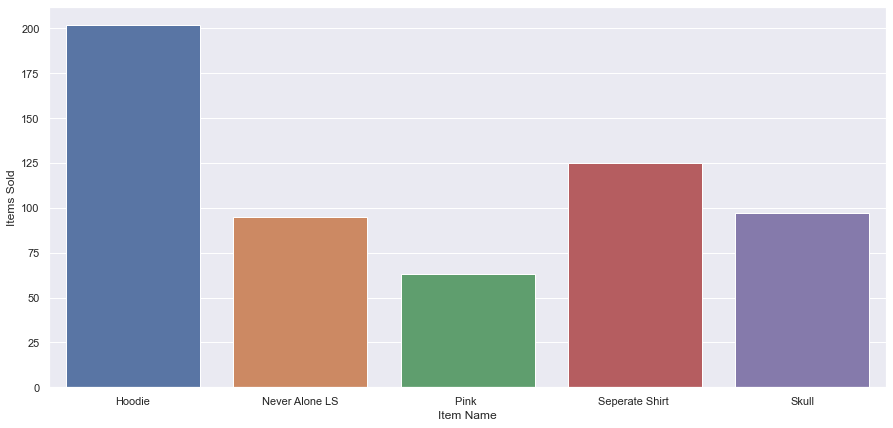

In [6]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(data = BAAO_items, x='Item Name', y='Items Sold')

In [7]:
BAAO_sizes = BAAO_insight_df.groupby('Item Variation')['Items Sold'].sum().reset_index()
total_sold = BAAO_items['Items Sold'].sum()
BAAO_sizes['Percentage'] = BAAO_sizes['Items Sold']/total_sold
BAAO_sizes = BAAO_sizes.reindex([2, 1, 0, 3, 4, 5])
BAAO_sizes

,Item Variation,Items Sold,Percentage
2,S,69,0.118557
1,M,126,0.216495
0,L,192,0.329897
3,XL,115,0.197595
4,XXL,57,0.097938
5,XXXL,23,0.039519


<AxesSubplot:xlabel='Item Variation', ylabel='Items Sold'>

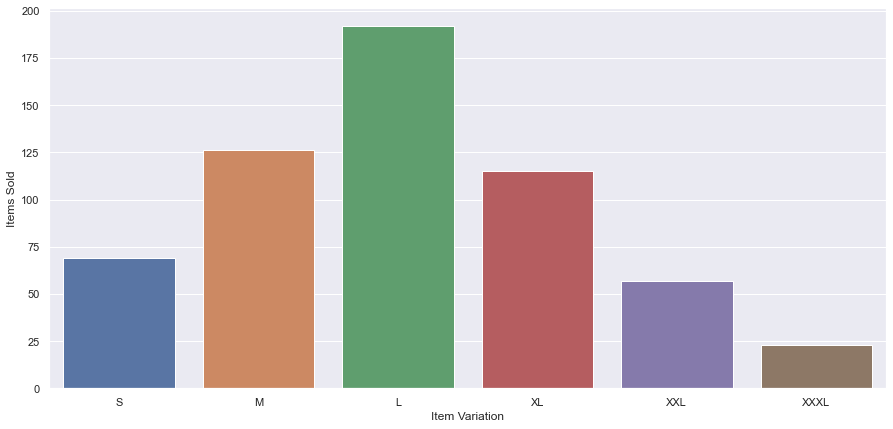

In [8]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(data = BAAO_sizes, x='Item Variation', y='Items Sold')

In [10]:
BAAO_insight_df['Projected Sold'] = BAAO_insight_df['Items Sold']*1.3333
BAAO_insight_df.sort_values(by='Item Name')

,Item Name,Item Variation,Items Sold,Projected Sold
11,Hoodie,L,67,89.3311
12,Hoodie,M,40,53.3320
14,Hoodie,XL,37,49.3321
13,Hoodie,S,26,34.6658
9,Hoodie,XXL,23,30.6659
10,Hoodie,XXXL,9,11.9997
20,Never Alone LS,XXL,7,9.3331
16,Never Alone LS,L,29,38.6657
17,Never Alone LS,M,27,35.9991
21,Never Alone LS,XXXL,7,9.3331


In [13]:
hoodie_df = BAAO_insight_df[(BAAO_insight_df['Item Name'] == 'Hoodie')]
shirt_df = BAAO_insight_df[(BAAO_insight_df['Item Name'] != 'Hoodie')]
hoodie_df = hoodie_df.reindex([13,12,11,14,9,10])

<AxesSubplot:xlabel='Item Variation', ylabel='Items Sold'>

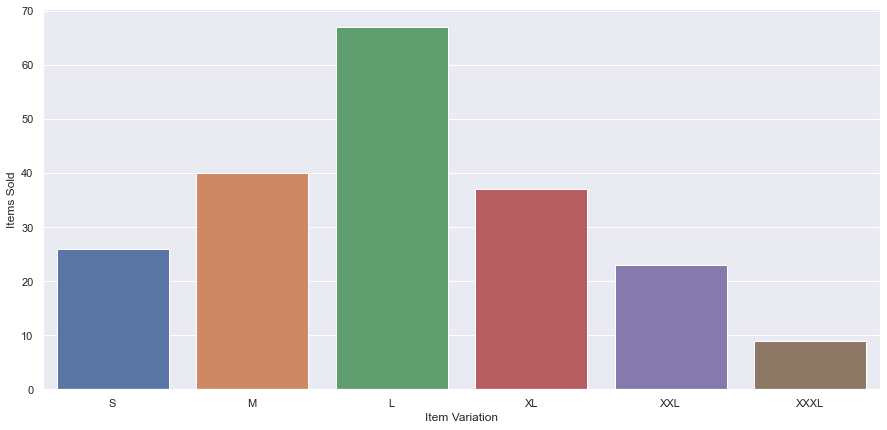

In [14]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(data = hoodie_df, x='Item Variation', y='Items Sold')

<AxesSubplot:xlabel='Item Variation', ylabel='Items Sold'>

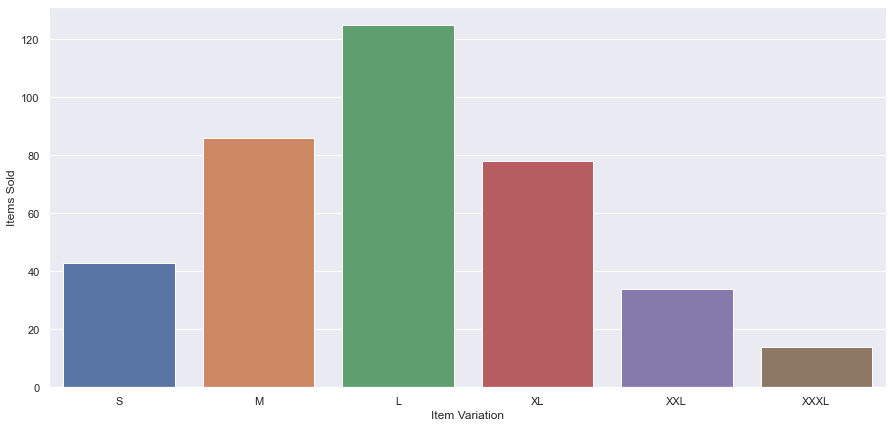

In [15]:
shirt_df = shirt_df.groupby('Item Variation')['Items Sold'].sum().reset_index()
shirt_df = shirt_df.reindex([2,1,0,3,4,5])
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(data = shirt_df, x='Item Variation', y='Items Sold')